# ML Nr 2: Google Analytics Customer Revenue Prediction

## Frame the problem and look at the big picture

Dette maskinlæringsprosjektet handler om å utvikle og trene en modell til å predikere samlet inntekt for filmer ved billettkontorer på verdensbasis. Notebooken er strukturert etter disse åtte punktene:
1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models and combine them into a great solution
7. Present your solution
8. Launch, monitor and maintain your system


## Get the data

In [46]:
# Import necesary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import ast

# Automatically reload modules defined in external files
%reload_ext autoreload
%autoreload 2

# Display plots directly in the notebook
%matplotlib inline

In [47]:
# Data gitt i oppgaven
print(os.listdir("../data"))

['sample_submission.csv', 'test.csv', 'train.csv']


In [48]:
# Bruker pandas til å lese filene
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
sampleSubmission = pd.read_csv('../data/sample_submission.csv')

## Explore the data to gain insights

In [49]:
# Se første fem rader i treningssettet
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [50]:
# Se første fem rader i testsettet
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [53]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


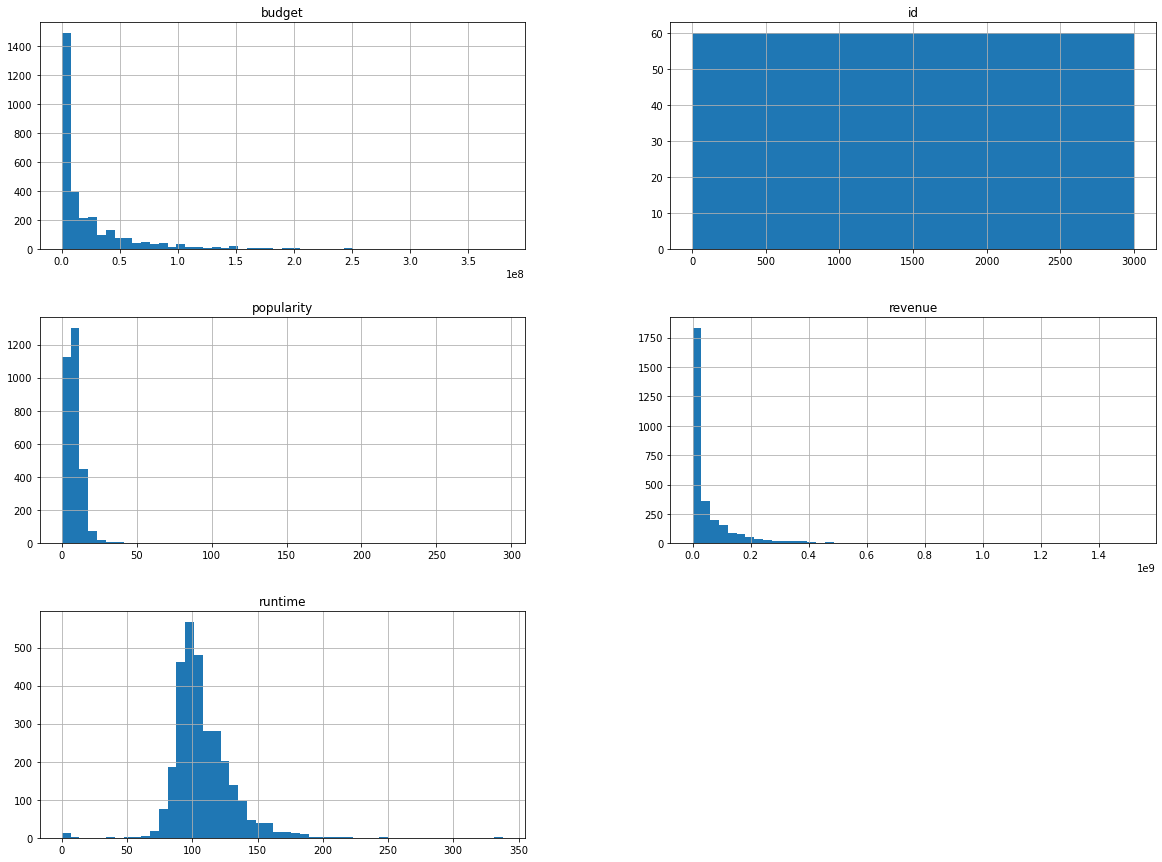

In [54]:
# Histogram for å finne ut mer om treningssettet
train.hist(bins=50, figsize=(20,15))
plt.show()

## Prepare the data to better expose the underlying data patterns to machine learning algorithms

### Data cleaning

#### Fjerner irrelevante kolonner

In [55]:
labels = train["revenue"].copy()

# Fjerner unyttige kolonner
list_drop = ["id", "homepage", "imdb_id", "original_title", "overview", "poster_path", "tagline", "title", "status"
             , "crew"];
train = train.drop(list_drop, axis=1)
test = test.drop(list_drop, axis=1)
train = train.drop("revenue", axis=1)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  604 non-null    object 
 1   budget                 3000 non-null   int64  
 2   genres                 2993 non-null   object 
 3   original_language      3000 non-null   object 
 4   popularity             3000 non-null   float64
 5   production_companies   2844 non-null   object 
 6   production_countries   2945 non-null   object 
 7   release_date           3000 non-null   object 
 8   runtime                2998 non-null   float64
 9   spoken_languages       2980 non-null   object 
 10  Keywords               2724 non-null   object 
 11  cast                   2987 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 281.4+ KB


In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  877 non-null    object 
 1   budget                 4398 non-null   int64  
 2   genres                 4382 non-null   object 
 3   original_language      4398 non-null   object 
 4   popularity             4398 non-null   float64
 5   production_companies   4140 non-null   object 
 6   production_countries   4296 non-null   object 
 7   release_date           4397 non-null   object 
 8   runtime                4394 non-null   float64
 9   spoken_languages       4356 non-null   object 
 10  Keywords               4005 non-null   object 
 11  cast                   4385 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 412.4+ KB


#### Belongs to Collection

Det som virker mest nyttig er om filmen hører til en kolleksjon eller ikke.

In [58]:
train["belongs_to_collection"] = np.where(pd.notnull(train["belongs_to_collection"]), 1, 0)
test["belongs_to_collection"] = np.where(pd.notnull(test["belongs_to_collection"]), 1, 0)
train["belongs_to_collection"].head()

0    1
1    1
2    0
3    0
4    0
Name: belongs_to_collection, dtype: int32

#### Fikse strenger

Noen kolonner inneholder lister av strenger. Her har vi kun lyst til å vise frem name.

In [59]:
def fix_strings(s):
    try:
        return ast.literal_eval(s)[0]['name']
    except:
        pass

In [60]:
train.genres = train.genres.apply(fix_strings)
train.production_companies = train.production_companies.apply(fix_strings)
train.production_countries = train.production_countries.apply(fix_strings)
train.spoken_languages = train.spoken_languages.apply(fix_strings)
train.Keywords = train.Keywords.apply(fix_strings)
train.cast = train.cast.apply(fix_strings)

test.genres = test.genres.apply(fix_strings)
test.production_companies = test.production_companies.apply(fix_strings)
test.production_countries = test.production_countries.apply(fix_strings)
test.spoken_languages = test.spoken_languages.apply(fix_strings)
test.Keywords = test.Keywords.apply(fix_strings)
test.cast = test.cast.apply(fix_strings)

In [61]:
train.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,Keywords,cast
0,1,14000000,Comedy,en,6.575393,Paramount Pictures,United States of America,2/20/15,93.0,English,time travel,Rob Corddry
1,1,40000000,Comedy,en,8.248895,Walt Disney Pictures,United States of America,8/6/04,113.0,English,coronation,Anne Hathaway
2,0,3300000,Drama,en,64.299990,Bold Films,United States of America,10/10/14,105.0,English,jazz,Miles Teller
3,0,1200000,Thriller,hi,3.174936,None,India,3/9/12,122.0,English,mystery,Vidya Balan
4,0,0,Action,ko,1.148070,None,South Korea,2/5/09,118.0,한국어/조선말,None,Kim Kang-woo


#### Release date

In [62]:
def fix_date(x):
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

In [63]:
train['release_date'] = train['release_date'].apply(lambda x: fix_date(x))

In [64]:
test.loc[test['release_date'].isnull() == True, 'release_date'] = '01/01/98'
test['release_date'] = test['release_date'].apply(lambda x: fix_date(x))

In [65]:
for index in range(3000):
    train['release_date'][index] = train['release_date'][index][-4:]

<ipython-input-65-fca24e3956b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['release_date'][index] = train['release_date'][index][-4:]


In [66]:
for index in range(4398):
    test['release_date'][index] = test['release_date'][index][-4:]

<ipython-input-66-feacc2dd8ca0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['release_date'][index] = test['release_date'][index][-4:]


In [67]:
train.rename(columns={'release_date': 'release_year'}, inplace=True)
test.rename(columns={'release_date': 'release_year'}, inplace=True)

In [68]:
train = train.astype({'release_year': int})
test = test.astype({'release_year': int})

### Transformation Pipelines

In [69]:
train_num = train[['belongs_to_collection', 'budget', 'popularity', 'runtime']]

num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

train_num_tr = num_pipeline.fit_transform(train_num)

In [70]:
train_num_tr

array([[ 1.99170465, -0.23045256, -0.15599768, -0.6728692 ],
       [ 1.99170465,  0.47187212, -0.01771439,  0.23310791],
       [-0.50208247, -0.51948618,  4.61384865, -0.12928293],
       ...,
       [-0.50208247,  1.14718432,  0.49736238,  0.5501999 ],
       [-0.50208247,  0.5258971 ,  0.6000891 , -0.80876577],
       [-0.50208247,  0.33680969,  0.16929745, -0.08398408]])

In [71]:
train['genres'].fillna('None', inplace=True)
train['production_companies'].fillna('None', inplace=True)
train['production_countries'].fillna('None', inplace=True)
train['spoken_languages'].fillna('None', inplace=True)
train['Keywords'].fillna('None', inplace=True)
train['cast'].fillna('None', inplace=True)

test['genres'].fillna('None', inplace=True)
test['production_companies'].fillna('None', inplace=True)
test['production_countries'].fillna('None', inplace=True)
test['spoken_languages'].fillna('None', inplace=True)
test['Keywords'].fillna('None', inplace=True)
test['cast'].fillna('None', inplace=True)

In [72]:
train.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_year,runtime,spoken_languages,Keywords,cast
0,1,14000000,Comedy,en,6.575393,Paramount Pictures,United States of America,2015,93.0,English,time travel,Rob Corddry
1,1,40000000,Comedy,en,8.248895,Walt Disney Pictures,United States of America,2004,113.0,English,coronation,Anne Hathaway
2,0,3300000,Drama,en,64.299990,Bold Films,United States of America,2014,105.0,English,jazz,Miles Teller
3,0,1200000,Thriller,hi,3.174936,None,India,2012,122.0,English,mystery,Vidya Balan
4,0,0,Action,ko,1.148070,None,South Korea,2009,118.0,한국어/조선말,None,Kim Kang-woo


In [73]:
train_cat = train[['genres', 'original_language', 'production_companies', 'production_countries', 'release_year',
                   'spoken_languages', 'Keywords', 'cast']]

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown = 'ignore')),
])

train_cat_tr = cat_pipeline.fit_transform(train_cat)

In [74]:
train_cat_tr.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
num_attribs = list(train_num)
cat_attribs = list(train_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

train_prepared = full_pipeline.fit_transform(train)

In [76]:
train_prepared

<3000x3982 sparse matrix of type '<class 'numpy.float64'>'
	with 36000 stored elements in Compressed Sparse Row format>

## Explore many different models and short-list the best ones

### Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_prepared, labels)

LinearRegression()

In [78]:
some_data = train.iloc[:5]
some_labels = labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lr.predict(some_data_prepared))

Predictions: [12314563.29539771 95149460.75640605 13091803.04566531 15999966.16782279
  3923872.51293214]


In [79]:
print("Labels:", list(some_labels))

Labels: [12314651, 95149435, 13092000, 16000000, 3923970]


In [80]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-lr_scores)

In [81]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lr_rmse_scores)

Scores: [3.13098716e+08 3.69369339e+08 4.09903907e+08 3.47650650e+08
 2.79840144e+08 3.09503983e+08 3.23627498e+08 2.73833421e+08
 3.81794270e+08 3.76188365e+08]
Mean: 338481029.27484477
Standard deviation: 43312702.65204523


### Decision Tree Regressor

In [82]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(train_prepared, labels)
print("Predictions:", dtr.predict(some_data_prepared))

Predictions: [12314651. 95149435. 13092000. 16000000.  3923970.]


In [83]:
print("Labels:", list(some_labels))

Labels: [12314651, 95149435, 13092000, 16000000, 3923970]


In [84]:
dtr_scores = cross_val_score(dtr, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
dtr_rmse_scores = np.sqrt(-dtr_scores)

display_scores(dtr_rmse_scores)

Scores: [1.00460612e+08 9.15591373e+07 1.18220676e+08 9.98408721e+07
 8.50028053e+07 1.06152461e+08 9.43528956e+07 9.14841797e+07
 9.29555392e+07 8.41261173e+07]
Mean: 96415529.52179632
Standard deviation: 9714816.39086958


### Random Forest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(train_prepared, labels)
print("Predictions:", rfr.predict(some_data_prepared))

Predictions: [3.06465291e+07 1.02842796e+08 4.81957911e+07 9.83084052e+06
 3.19818492e+06]


In [86]:
print("Labels:", list(some_labels))

Labels: [12314651, 95149435, 13092000, 16000000, 3923970]


In [87]:
rfr_scores = cross_val_score(rfr, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
rfr_rmse_scores = np.sqrt(-rfr_scores)

display_scores(rfr_rmse_scores)

Scores: [73514691.55828156 75639094.82186101 92844715.93995102 72020880.73127897
 75553481.47963229 89596234.00707214 65034911.8353451  80001099.84224838
 81838555.24257658 64665286.05980819]
Mean: 77070895.15180552
Standard deviation: 8822018.337012308


## Fine-tune your models and combine them into a great solution

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10, 50, 100], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [10, 50], 'max_features': [2, 4, 6]},
]

rfr = RandomForestRegressor()

grid_search = GridSearchCV(rfr, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(train_prepared, labels);

In [89]:
# Vis parametre for best resultat
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 50}

In [90]:
model = grid_search.best_estimator_
model

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=50)

In [91]:
model_scores = cross_val_score(model, train_prepared, labels, scoring="neg_mean_squared_error", cv=10)
model_rmse_scores = np.sqrt(-model_scores)

display_scores(model_rmse_scores)

Scores: [8.08453230e+07 7.55387441e+07 1.13982197e+08 1.01353150e+08
 6.79889907e+07 1.09062498e+08 7.59102685e+07 9.99125340e+07
 9.34186247e+07 8.98834644e+07]
Mean: 90789579.3865486
Standard deviation: 14652932.308003217


In [92]:
test_prepared = full_pipeline.transform(test)
revenue = model.predict(test_prepared)
revenue

array([35630071.68, 13842025.8 , 46174317.88, ..., 51442375.94,
       86168059.84, 13219794.38])



## Export trained model

Eksporterer modellen vår.

In [93]:
from pathlib import Path
NB_DIR = Path.cwd()
MODEL_DIR = NB_DIR/'..'/'models'

In [94]:
from joblib import dump
dump(full_pipeline, MODEL_DIR/'pipeline.joblib', compress=3)

['C:\\Users\\Jon\\OneDrive\\Dokumenter\\Dataingeniør\\5 semester\\DAT158\\DAT158ML-Mandatory-exercise-2\\nbs\\..\\models\\pipeline.joblib']